<a href="https://colab.research.google.com/github/NuoWenLei/AAPI-text-analysis-project/blob/main/notebooks/visual_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyze Data with Visualizations

## Setup

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
sns.set_theme()

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/AAPI_text_analysis_project/full_df_7_4_2021.csv")
df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,location,title_length,body_length,source_score,source_link,source_position,source_pos_int,title_doc,body_doc,title_JJ,title_NNS,title_VBP,title_NN,title_NNP,title_:,title_VBZ,title_JJR,title_MD,title_VBN,title_VB,title_VBD,title_NNPS,title_VBG,title_IN,"title_,",title_POS,title_'',title_DT,...,"title_,_per_word",title_POS_per_word,title_''_per_word,title_DT_per_word,title_CD_per_word,title_WRB_per_word,title_RB_per_word,title_PRP_per_word,title_PRP$_per_word,title_RP_per_word,title_PDT_per_word,title_TO_per_word,title_``_per_word,title_FW_per_word,title_CC_per_word,title_._per_word,title_WP_per_word,title_JJS_per_word,title_(_per_word,title_)_per_word,title_$_per_word,title_UH_per_word,title_RBS_per_word,position_adjusted,nltk_body_sentiment_compound,nltk_title_sentiment_compound,nltk_body_sentiment_neg,nltk_title_sentiment_neg,nltk_body_sentiment_neu,nltk_title_sentiment_neu,nltk_body_sentiment_pos,nltk_title_sentiment_pos,title_negation,body_negation,title_negation_per_word,body_negation_per_word,title_stem,title_stem_pos,body_stem,body_stem_pos
0,-0.168627,38,6601183495,Racial tensions simmer as Southern Baptists ho...,"NASHVILLE, Tenn. -- Race-related tensions with...",abcnews.go.com,ABC News,171,615,150359,True,2021-06-11,"Nashville, Tennessee",9,1454,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Racial"", ""tensions"", ""simmer"", ""as"", ""Southe...","[""NASHVILLE"", "","", ""Tenn."", ""--"", ""Race-relate...",3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,0.9906,-0.4019,0.075,0.252,0.824,0.748,0.100,0.0,0,140,0.0,0.096286,"[""racial"", ""tension"", ""simmer"", ""southern"", ""b...","[""JJ"", ""NN"", ""VB"", ""JJ"", ""NN"", ""VB"", ""JJ"", ""NN""]","[""nashvil"", ""tenn."", ""race-rel"", ""tension"", ""w...","[""NN"", ""NN"", ""JJ"", ""NN"", ""IN"", ""JJ"", ""NN"", ""NN..."
1,-0.498039,64,6589548036,Asian American and Pacific Islander hate: Grap...,The U.S. has seen a disturbing surge in hate i...,abcnews.go.com,ABC News,171,615,150359,True,2021-06-03,United States,13,156,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Asian"", ""American"", ""and"", ""Pacific"", ""Islan...","[""The"", ""U.S."", ""has"", ""seen"", ""a"", ""disturbin...",1,2,0,1,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,-0.9833,-0.7184,0.201,0.375,0.778,0.625,0.021,0.0,0,0,0.0,0.000000,"[""asian"", ""american"", ""pacif"", ""island"", ""hate...","[""JJ"", ""NN"", ""NN"", ""NN"", ""NN"", ""NN"", ""VB"", ""NN...","[""the"", ""u.s."", ""seen"", ""disturb"", ""surg"", ""ha...","[""DT"", ""NN"", ""VB"", ""VB"", ""NN"", ""JJ"", ""NN"", ""JJ..."
2,0.003922,118,6578408470,AP-NORC poll: More Americans believe anti-Asia...,WASHINGTON -- A majority of Americans across r...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-26,Washington (state),9,1091,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""AP-NORC"", ""poll"", "":"", ""More"", ""Americans"", ...","[""WASHINGTON"", ""--"", ""A"", ""majority"", ""of"", ""A...",2,1,1,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,-0.9982,-0.5719,0.141,0.346,0.795,0.654,0.065,0.0,0,91,0.0,0.083410,"[""ap-norc"", ""poll"", ""more"", ""american"", ""belie...","[""JJ"", ""NN"", ""JJ"", ""NN"", ""VB"", ""JJ"", ""NN"", ""NN""]","[""washington"", ""A"", ""major"", ""american"", ""acro...","[""NN"", ""DT"", ""NN"", ""NN"", ""IN"", ""JJ"", ""JJ"", ""NN..."
3,-0.325490,39,6573140750,Floyd legislation reveals divide in police-ref...,NEW YORK -- Monifa Bandele became a community ...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-22,New York City,7,1409,355101,/news-source/abc-news-media-bias,

## Part of Speech Visualization

### Article Title

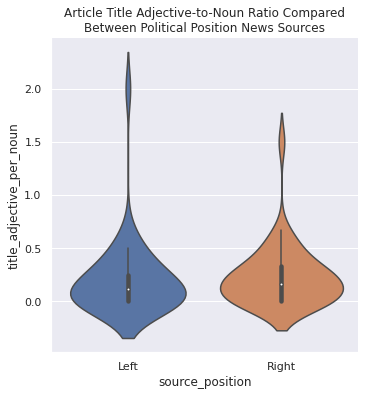

In [ ]:
sns.catplot(data = df[df['source_position'].isin(['Left', 'Right'])], x = "source_position", y = "title_adjective_per_noun", kind = "violin")
plt.title("Article Title Adjective-to-Noun Ratio Compared\nBetween Political Position News Sources")
pass

### Article Body

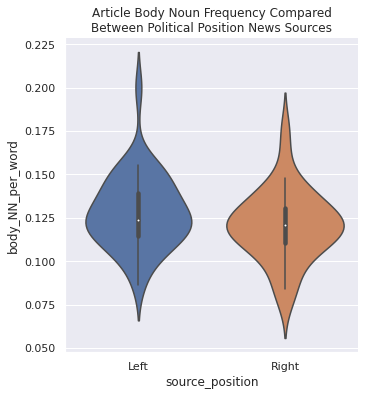

In [ ]:
sns.catplot(data = df[df['source_position'].isin(['Left', 'Right'])], x = "source_position", y = "body_NN_per_word", kind = "violin")
plt.title("Article Body Noun Frequency Compared\nBetween Political Position News Sources")
pass

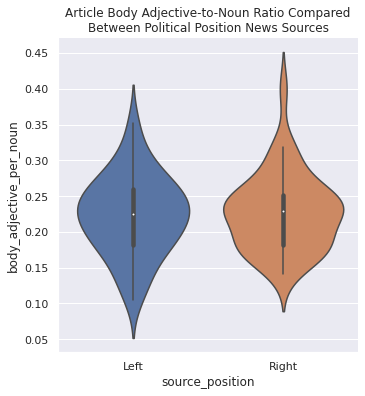

In [ ]:
sns.catplot(data = df[df['source_position'].isin(['Left', 'Right'])], x = "source_position", y = "body_adjective_per_noun", kind = "violin")
plt.title("Article Body Adjective-to-Noun Ratio Compared\nBetween Political Position News Sources")
pass

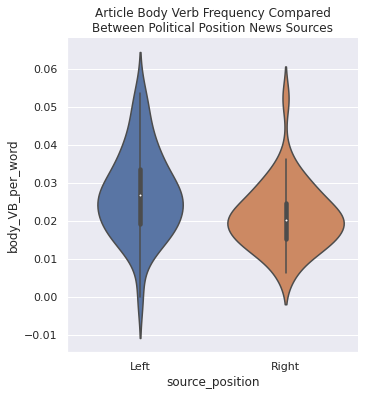

In [ ]:
sns.catplot(data = df[df['source_position'].isin(['Left', 'Right'])], x = "source_position", y = "body_VB_per_word", kind = "violin")
plt.title("Article Body Verb Frequency Compared\nBetween Political Position News Sources")
pass

## Sentiment Visualization

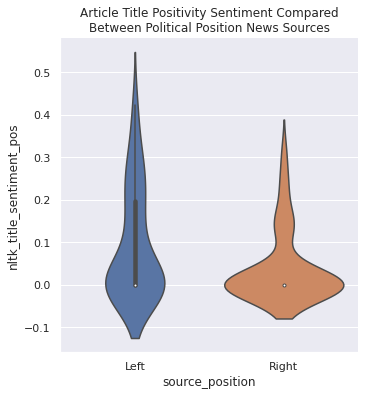

In [ ]:
sns.catplot(data = df[df['source_position'].isin(['Left', 'Right'])], x = "source_position", y = "nltk_title_sentiment_pos", kind = "violin")
plt.title("Article Title Positivity Sentiment Compared\nBetween Political Position News Sources")
pass

## Article Structure Visualization

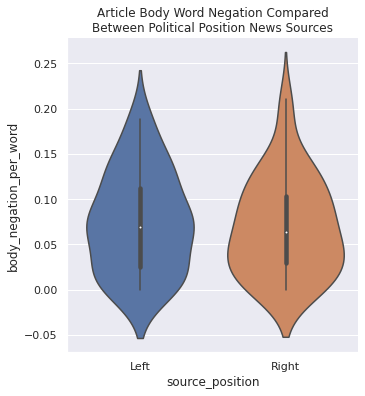

In [ ]:
sns.catplot(data = df[df['source_position'].isin(['Left', 'Right'])], x = "source_position", y = "body_negation_per_word", kind = "violin")
plt.title("Article Body Word Negation Compared\nBetween Political Position News Sources")
pass

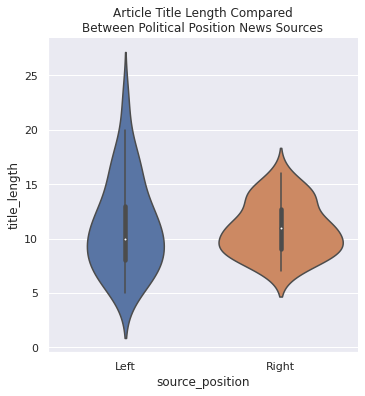

In [ ]:
sns.catplot(data = df[df['source_position'].isin(['Left', 'Right'])], x = "source_position", y = "title_length", kind = "violin")
plt.title("Article Title Length Compared\nBetween Political Position News Sources")
pass

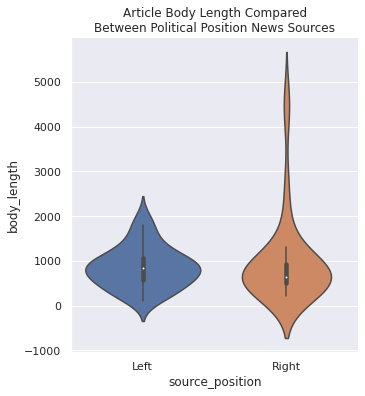

In [ ]:
sns.catplot(data = df[df['source_position'].isin(['Left', 'Right'])], x = "source_position", y = "body_length", kind = "violin")
plt.title("Article Body Length Compared\nBetween Political Position News Sources")
pass

## Word Choice Visualization

### Load Data and Functions

In [ ]:
import nltk

In [ ]:
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
title_stem_df = pd.read_csv("/content/gdrive/MyDrive/AAPI_text_analysis_project/title_stem_dataframe.csv")
title_stem_df.head()

,Lean Left,Left,Center,Lean Right,Right,stem,pos,usage_sum,0_per_article_left,1_per_article_lean_left,4_per_article_right,3_per_article_lean_right,2_per_article_center,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy
0,11,0,15,0,4,racial,JJ,30,0.000000,0.063584,0.105263,0.0,0.066372,0.000000,0.063584,0.105263,0.0,0.066372
1,3,1,1,0,0,tension,NN,5,0.027027,0.017341,0.000000,0.0,0.004425,0.027027,0.017341,0.000000,0.0,0.004425
2,2,1,1,0,0,simmer,VB,4,0.027027,0.011561,0.000000,0.0,0.004425,0.027027,0.011561,0.000000,0.0,0.004425
3,3,1,1,0,0,southern,JJ,5,0.027027,0.017341,0.000000,0.0,0.004425,0.027027,0.017341,0.000000,0.0,0.004425
4,4,1,2,0,0,baptist,NN,7,0.027027,0.023121,0.000000,0.0,0.008850,0.027027,0.023121,0.000000,0.0,0.008850


In [ ]:
body_stem_df = pd.read_csv("/content/gdrive/MyDrive/AAPI_text_analysis_project/body_stem_dataframe.csv")
body_stem_df.head()

,Lean Left,Left,Center,Lean Right,Right,stem,pos,usage_sum,0_per_article_left,1_per_article_lean_left,4_per_article_right,3_per_article_lean_right,2_per_article_center,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy
0,10,3,4,0,0,nashvil,NN,17,0.081081,0.057803,0.000000,0.000000,0.017699,0.081081,0.057803,0.000000,0.000000,0.017699
1,4,0,1,0,0,tenn.,NN,5,0.000000,0.023121,0.000000,0.000000,0.004425,0.000000,0.023121,0.000000,0.000000,0.004425
2,7,2,3,0,1,race-rel,JJ,13,0.054054,0.040462,0.026316,0.000000,0.013274,0.054054,0.040462,0.026316,0.000000,0.013274
3,24,3,20,2,2,tension,NN,51,0.081081,0.138728,0.052632,0.068966,0.088496,0.081081,0.138728,0.052632,0.068966,0.088496
4,34,6,43,4,10,within,IN,97,0.162162,0.196532,0.263158,0.137931,0.190265,0.162162,0.196532,0.263158,0.137931,0.190265


In [ ]:
melt_title_df = pd.melt(title_stem_df, id_vars = ["stem",
                                                  "usage_sum",
                                                  "pos",
                                                  "0_per_article_left_copy",
                                                  "1_per_article_lean_left_copy",
                                                  "4_per_article_right_copy",
                                                  "3_per_article_lean_right_copy",
                                                  "2_per_article_center_copy"
                                                  ],
                        value_vars = ["0_per_article_left",
                                      "1_per_article_lean_left",
                                      "4_per_article_right",
                                      "3_per_article_lean_right",
                                      "2_per_article_center"],
                  var_name = "position",
                  value_name = "usage_per_article")
melt_title_df.head()

,stem,usage_sum,pos,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy,position,usage_per_article
0,racial,30,JJ,0.000000,0.063584,0.105263,0.0,0.066372,0_per_article_left,0.000000
1,tension,5,NN,0.027027,0.017341,0.000000,0.0,0.004425,0_per_article_left,0.027027
2,simmer,4,VB,0.027027,0.011561,0.000000,0.0,0.004425,0_per_article_left,0.027027
3,southern,5,JJ,0.027027,0.017341,0.000000,0.0,0.004425,0_per_article_left,0.027027
4,baptist,7,NN,0.027027,0.023121,0.000000,0.0,0.008850,0_per_article_left,0.027027


In [ ]:
melt_body_df = pd.melt(body_stem_df, id_vars = ["stem",
                                                  "usage_sum",
                                                  "pos",
                                                  "0_per_article_left_copy",
                                                  "1_per_article_lean_left_copy",
                                                  "4_per_article_right_copy",
                                                  "3_per_article_lean_right_copy",
                                                  "2_per_article_center_copy"
                                                  ],
                        value_vars = ["0_per_article_left",
                                      "1_per_article_lean_left",
                                      "4_per_article_right",
                                      "3_per_article_lean_right",
                                      "2_per_article_center"],
                  var_name = "position",
                  value_name = "usage_per_article")
melt_body_df.head()

,stem,usage_sum,pos,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy,position,usage_per_article
0,nashvil,17,NN,0.081081,0.057803,0.000000,0.000000,0.017699,0_per_article_left,0.081081
1,tenn.,5,NN,0.000000,0.023121,0.000000,0.000000,0.004425,0_per_article_left,0.000000
2,race-rel,13,JJ,0.054054,0.040462,0.026316,0.000000,0.013274,0_per_article_left,0.054054
3,tension,51,NN,0.081081,0.138728,0.052632,0.068966,0.088496,0_per_article_left,0.081081
4,within,97,IN,0.162162,0.196532,0.263158,0.137931,0.190265,0_per_article_left,0.162162


In [ ]:
title_percent_stem_df = pd.read_csv("/content/gdrive/MyDrive/AAPI_text_analysis_project/title_stem_df_by_word_use_percent.csv")
body_percent_stem_df = pd.read_csv("/content/gdrive/MyDrive/AAPI_text_analysis_project/body_stem_df_by_word_use_percent.csv")


In [ ]:
title_percent_stem_df.head()

,Lean Left,Left,Center,Lean Right,Right,stem,pos,usage_sum,0_per_article_left,1_per_article_lean_left,4_per_article_right,3_per_article_lean_right,2_per_article_center,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy
0,11,0,15,0,4,racial,JJ,30,0.00000,0.005691,0.009685,0.0,0.005714,0.00000,0.005691,0.009685,0.0,0.005714
1,3,1,1,0,0,tension,NN,5,0.00241,0.001552,0.000000,0.0,0.000381,0.00241,0.001552,0.000000,0.0,0.000381
2,2,1,1,0,0,simmer,VB,4,0.00241,0.001035,0.000000,0.0,0.000381,0.00241,0.001035,0.000000,0.0,0.000381
3,3,1,1,0,0,southern,JJ,5,0.00241,0.001552,0.000000,0.0,0.000381,0.00241,0.001552,0.000000,0.0,0.000381
4,4,1,2,0,0,baptist,NN,7,0.00241,0.002069,0.000000,0.0,0.000762,0.00241,0.002069,0.000000,0.0,0.000762


In [ ]:
melt_title_percent_df = pd.melt(title_percent_stem_df, id_vars = ["stem",
                                                  "usage_sum",
                                                  "pos",
                                                  "0_per_article_left_copy",
                                                  "1_per_article_lean_left_copy",
                                                  "4_per_article_right_copy",
                                                  "3_per_article_lean_right_copy",
                                                  "2_per_article_center_copy"
                                                  ],
                        value_vars = ["0_per_article_left",
                                      "1_per_article_lean_left",
                                      "4_per_article_right",
                                      "3_per_article_lean_right",
                                      "2_per_article_center"],
                  var_name = "position",
                  value_name = "usage_per_article")
melt_title_percent_df.head()

,stem,usage_sum,pos,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy,position,usage_per_article
0,racial,30,JJ,0.00000,0.005691,0.009685,0.0,0.005714,0_per_article_left,0.00000
1,tension,5,NN,0.00241,0.001552,0.000000,0.0,0.000381,0_per_article_left,0.00241
2,simmer,4,VB,0.00241,0.001035,0.000000,0.0,0.000381,0_per_article_left,0.00241
3,southern,5,JJ,0.00241,0.001552,0.000000,0.0,0.000381,0_per_article_left,0.00241
4,baptist,7,NN,0.00241,0.002069,0.000000,0.0,0.000762,0_per_article_left,0.00241


In [ ]:
melt_body_percent_df = pd.melt(body_percent_stem_df, id_vars = ["stem",
                                                  "usage_sum",
                                                  "pos",
                                                  "0_per_article_left_copy",
                                                  "1_per_article_lean_left_copy",
                                                  "4_per_article_right_copy",
                                                  "3_per_article_lean_right_copy",
                                                  "2_per_article_center_copy"
                                                  ],
                        value_vars = ["0_per_article_left",
                                      "1_per_article_lean_left",
                                      "4_per_article_right",
                                      "3_per_article_lean_right",
                                      "2_per_article_center"],
                  var_name = "position",
                  value_name = "usage_per_article")
melt_body_percent_df.head()

,stem,usage_sum,pos,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy,position,usage_per_article
0,nashvil,17,NN,0.000094,0.000061,0.000000,0.000000,0.000018,0_per_article_left,0.000094
1,tenn.,5,NN,0.000000,0.000025,0.000000,0.000000,0.000004,0_per_article_left,0.000000
2,race-rel,13,JJ,0.000063,0.000043,0.000027,0.000000,0.000013,0_per_article_left,0.000063
3,tension,51,NN,0.000094,0.000147,0.000054,0.000062,0.000088,0_per_article_left,0.000094
4,within,97,IN,0.000189,0.000209,0.000269,0.000124,0.000189,0_per_article_left,0.000189


In [ ]:
def plot_word_usage_by_pos(melt_df, part_of_speech=None, political_position="usage_sum", title_ = "Word Frequency in Article Titles\nby Political Position of News Source", num_highest_used=10, exclude_front_outliers = 0):
  to_sort = "usage_sum"
  if political_position.lower() == "left":
    to_sort = ["0_per_article_left_copy", "usage_sum"]
  if political_position.lower() == "lean_left":
    to_sort = ["1_per_article_lean_left_copy", "usage_sum"]
  if political_position.lower() == "center":
    to_sort = ["2_per_article_center_copy", "usage_sum"]
  if political_position.lower() == "lean_right":
    to_sort = ["3_per_article_lean_right_copy", "usage_sum"]
  if political_position.lower() == "right":
    to_sort = ["4_per_article_right_copy", "usage_sum"]


  filt_data = melt_df.sort_values(to_sort, ascending = False)

  if part_of_speech is not None:

    filt_data = melt_df[melt_df['pos'] == part_of_speech.upper()].sort_values(to_sort, ascending = False)  

  top_stems = filt_data.groupby(['stem', 'pos']).sum().sort_values(to_sort, ascending = False).index.values[exclude_front_outliers:exclude_front_outliers + num_highest_used]

  filtered_data = []

  for stem, pos in top_stems:
    filtered_data.extend(filt_data[(filt_data['stem'] == stem) & (filt_data['pos'] == pos)].values.tolist())

  filtered_df = pd.DataFrame(filtered_data, columns = filt_data.columns).sort_values(to_sort, ascending = False)

  sns.barplot(data = filtered_df, x = "stem", y = "usage_per_article", hue = "position", hue_order = ["0_per_article_left",
                                                                "1_per_article_lean_left",
                                                                "2_per_article_center",
                                                                "3_per_article_lean_right",
                                                                "4_per_article_right"],
                       palette = ["blue", "cyan", "green", 'tomato', 'red'], ci = None)
  plt.xticks(rotation = -90)

  ax = plt.gca()

  handles, labels = ax.get_legend_handles_labels()

  new_handles = [h for h, l in sorted(zip(handles, labels), key = lambda x: x[1])]

  ax.legend(new_handles, ["Left", "Lean Left", "Center", "Lean Right", "Right"], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

  
  plt.title(title_)

  plt.xlabel("Word Stem")

  plt.ylabel("Frequeuncy per Article")

  plt.show()


### Frequency Per Article

#### Unfiltered Frequency

##### Article Title

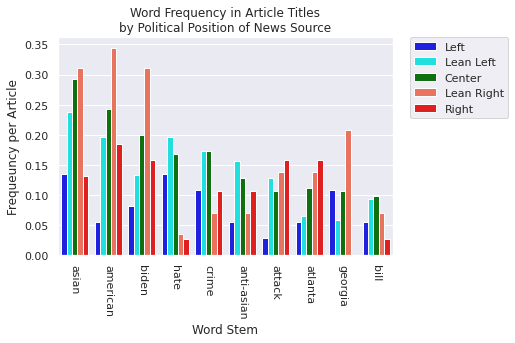

In [ ]:
plot_word_usage_by_pos(melt_title_df)

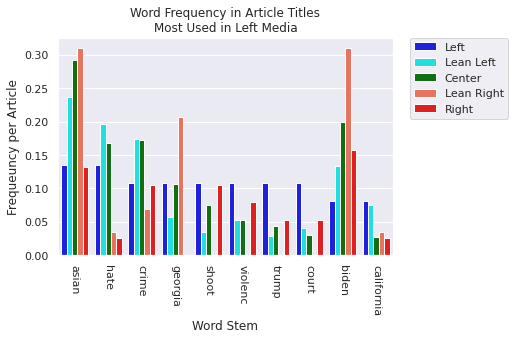

In [ ]:
plot_word_usage_by_pos(melt_title_df, political_position="left", title_ = "Word Frequency in Article Titles\nMost Used in Left Media")

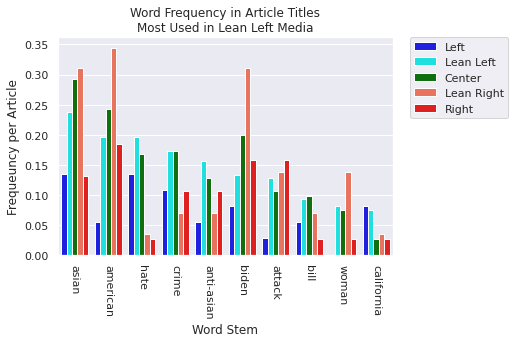

In [ ]:
plot_word_usage_by_pos(melt_title_df, political_position="lean_left", title_ = "Word Frequency in Article Titles\nMost Used in Lean Left Media")

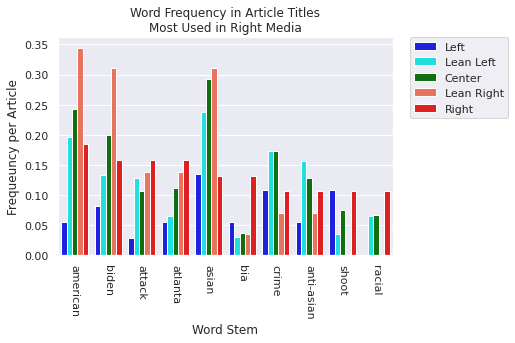

In [ ]:
plot_word_usage_by_pos(melt_title_df, political_position="right", title_ = "Word Frequency in Article Titles\nMost Used in Right Media")

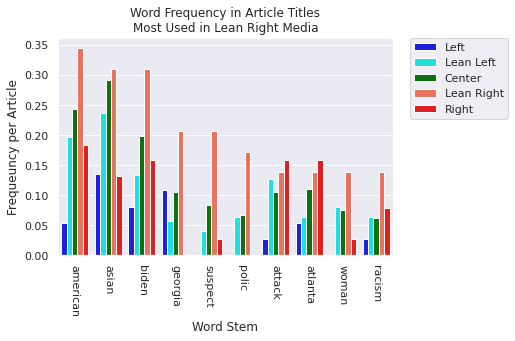

In [ ]:
plot_word_usage_by_pos(melt_title_df, political_position="lean_right", title_ = "Word Frequency in Article Titles\nMost Used in Lean Right Media")

##### Article Body

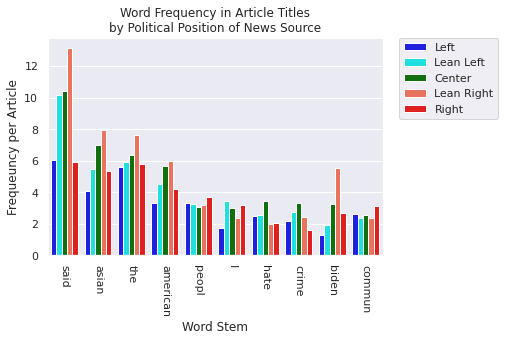

In [ ]:
plot_word_usage_by_pos(melt_body_df)

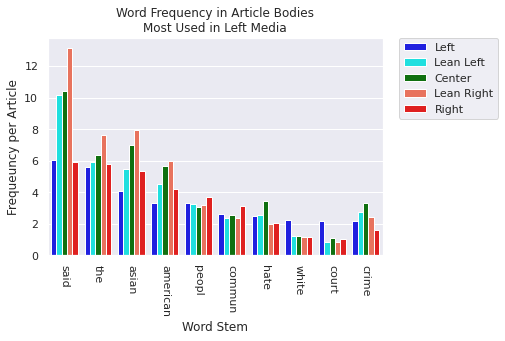

In [ ]:
plot_word_usage_by_pos(melt_body_df, political_position="left", title_ = "Word Frequency in Article Bodies\nMost Used in Left Media")

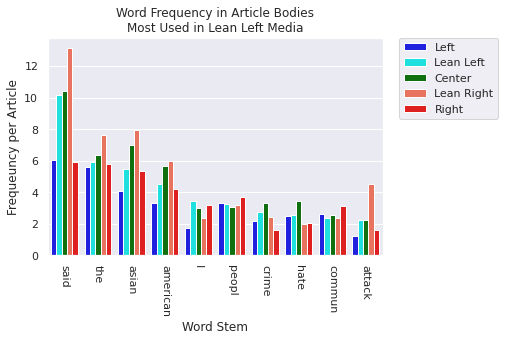

In [ ]:
plot_word_usage_by_pos(melt_body_df, political_position="lean_left", title_ = "Word Frequency in Article Bodies\nMost Used in Lean Left Media")

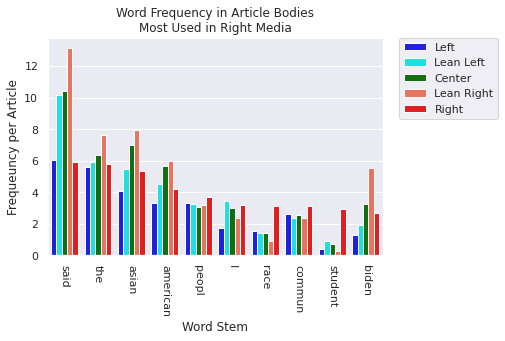

In [ ]:
plot_word_usage_by_pos(melt_body_df, political_position="right", title_ = "Word Frequency in Article Bodies\nMost Used in Right Media")

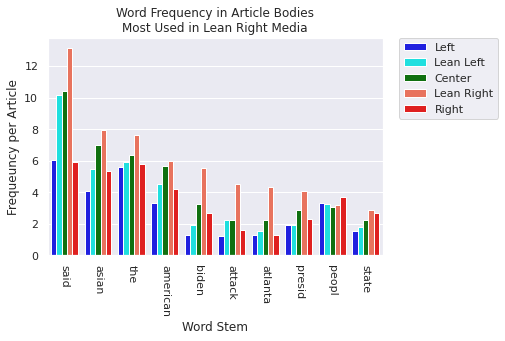

In [ ]:
plot_word_usage_by_pos(melt_body_df, political_position="lean_right", title_ = "Word Frequency in Article Bodies\nMost Used in Lean Right Media")

#### Verb Frequency

##### Article Title

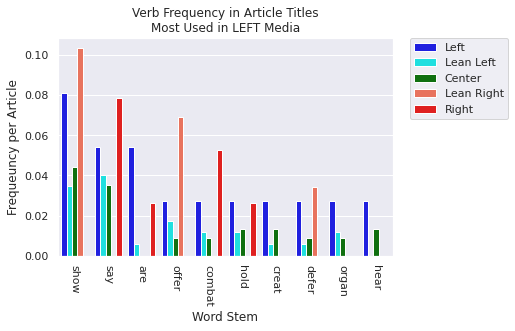

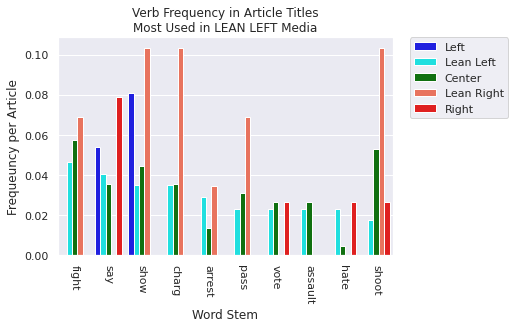

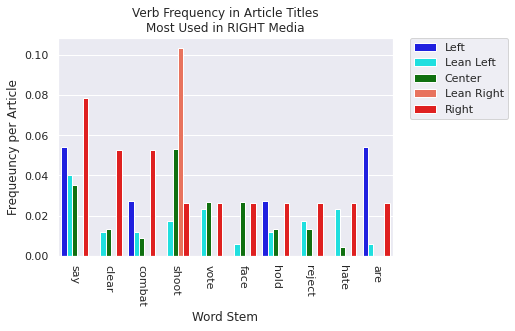

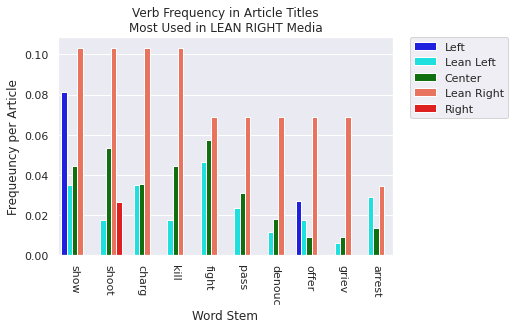

In [ ]:

for position in ['left', 'lean_left', 'right', 'lean_right']:
  plot_word_usage_by_pos(melt_title_df, part_of_speech = "VB", political_position=position, title_ = f"Verb Frequency in Article Titles\nMost Used in {position.replace('_', ' ').upper()} Media")

##### Article Body

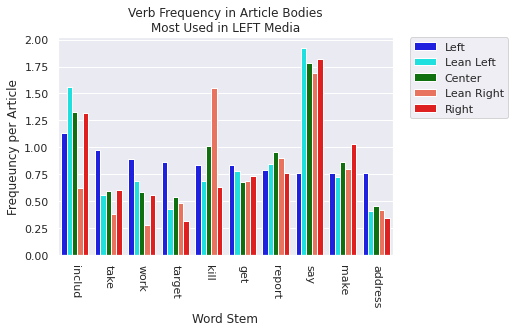

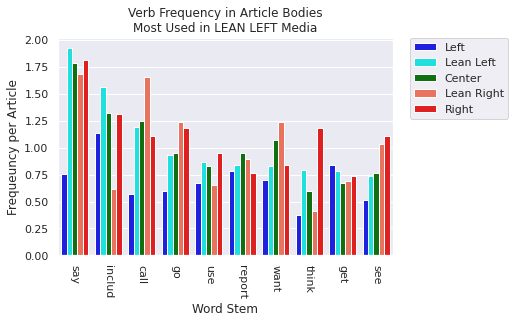

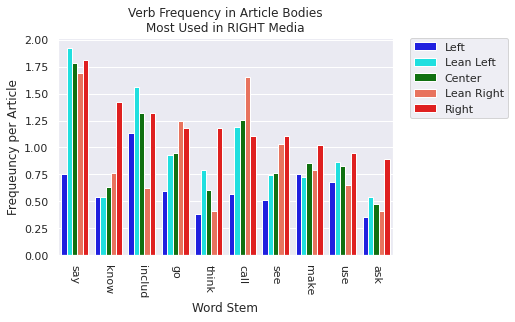

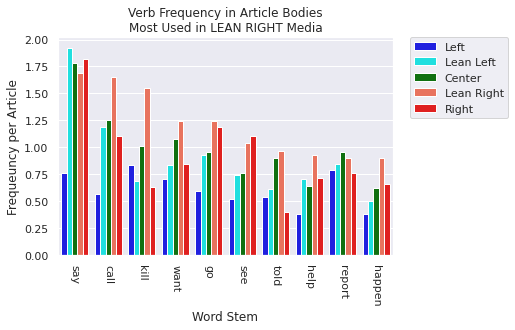

In [ ]:

for position in ['left', 'lean_left', 'right', 'lean_right']:
  plot_word_usage_by_pos(melt_body_df, part_of_speech = "VB", political_position=position, title_ = f"Verb Frequency in Article Bodies\nMost Used in {position.replace('_', ' ').upper()} Media", exclude_front_outliers=1)

#### Noun Frequency

##### Article Title

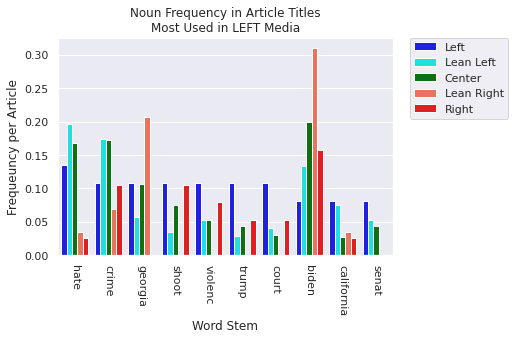

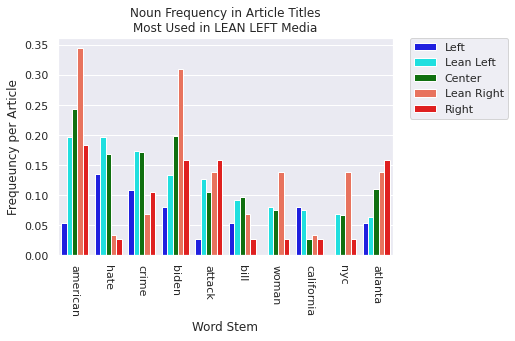

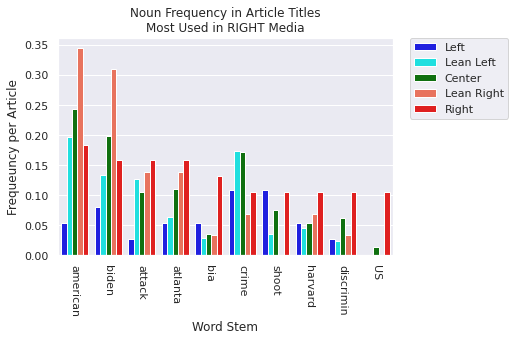

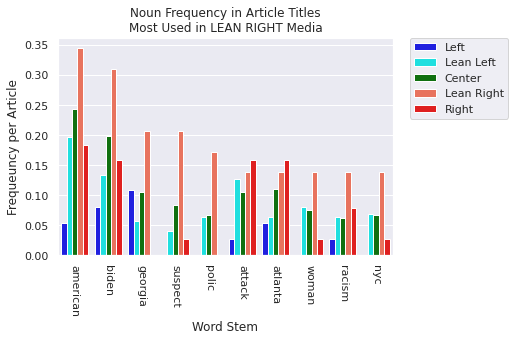

In [ ]:

for position in ['left', 'lean_left', 'right', 'lean_right']:
  plot_word_usage_by_pos(melt_title_df, part_of_speech = "NN", political_position=position, title_ = f"Noun Frequency in Article Titles\nMost Used in {position.replace('_', ' ').upper()} Media")

##### Article Body

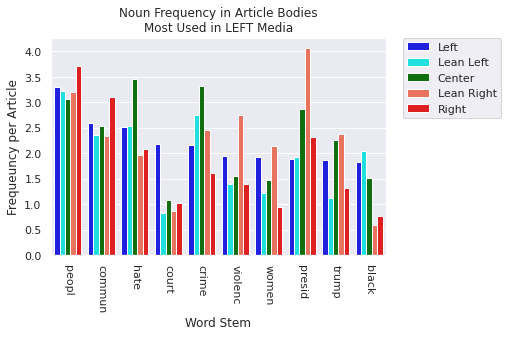

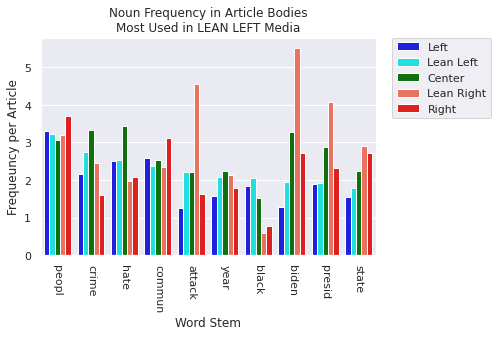

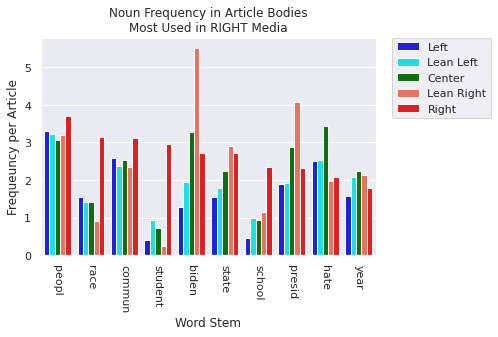

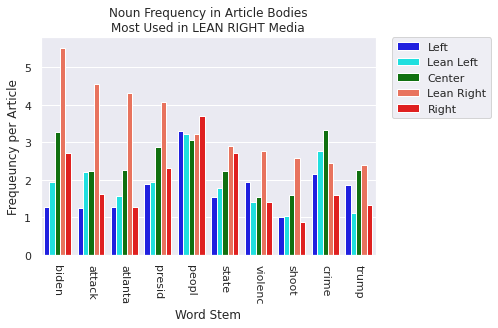

In [ ]:

for position in ['left', 'lean_left', 'right', 'lean_right']:
  plot_word_usage_by_pos(melt_body_df, part_of_speech = "NN", political_position=position, title_ = f"Noun Frequency in Article Bodies\nMost Used in {position.replace('_', ' ').upper()} Media", exclude_front_outliers=1)

#### Adjective Frequency

##### Article Title

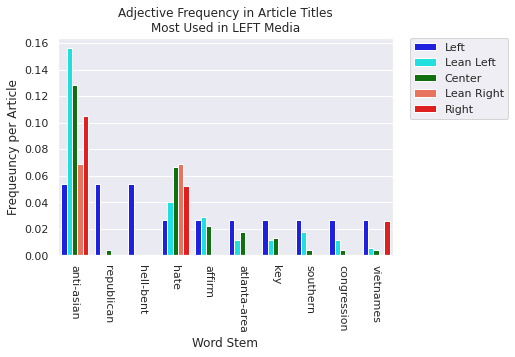

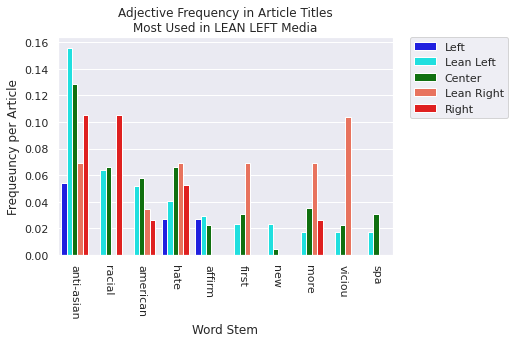

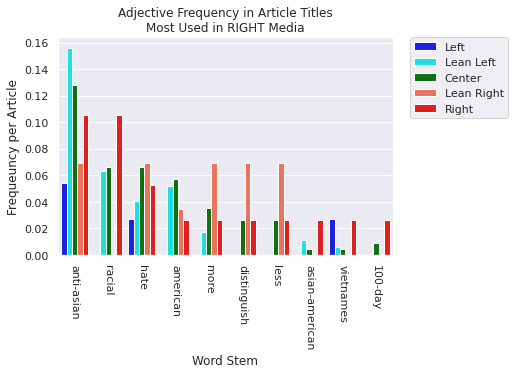

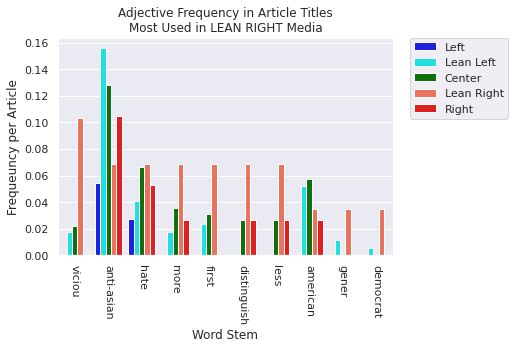

In [ ]:

for position in ['left', 'lean_left', 'right', 'lean_right']:
  plot_word_usage_by_pos(melt_title_df, part_of_speech = "JJ", political_position=position, title_ = f"Adjective Frequency in Article Titles\nMost Used in {position.replace('_', ' ').upper()} Media", exclude_front_outliers=1)

##### Article Body

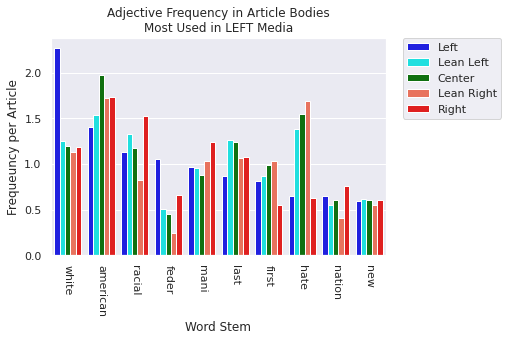

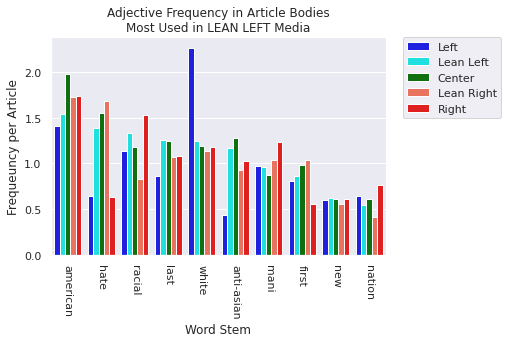

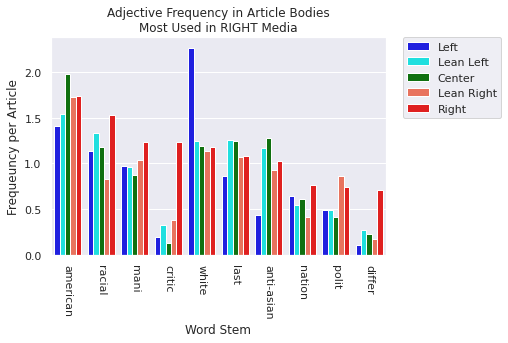

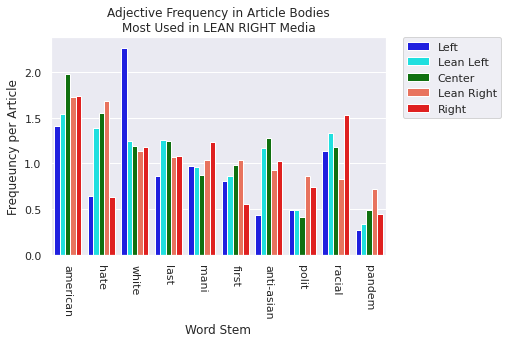

In [ ]:

for position in ['left', 'lean_left', 'right', 'lean_right']:
  plot_word_usage_by_pos(melt_body_df, part_of_speech = "JJ", political_position=position, title_ = f"Adjective Frequency in Article Bodies\nMost Used in {position.replace('_', ' ').upper()} Media", exclude_front_outliers=1)

### Percentage of Word Used

#### Unfiltered Percentage

##### Article Title

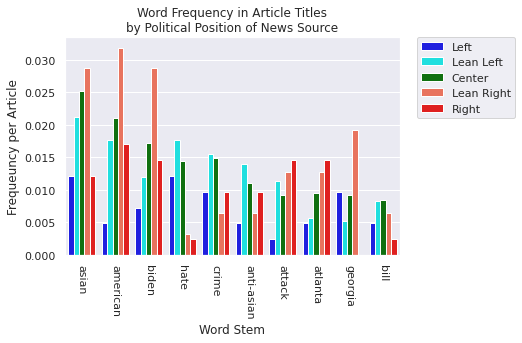

In [ ]:
plot_word_usage_by_pos(melt_title_percent_df)

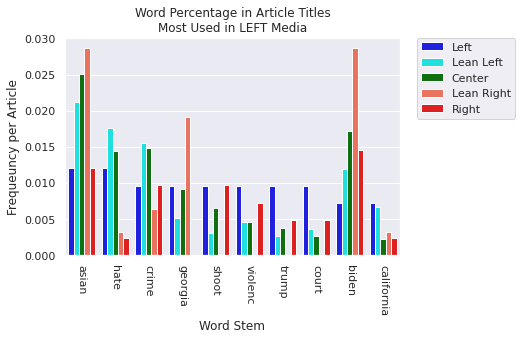

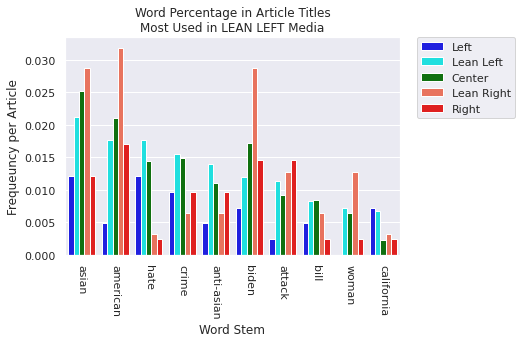

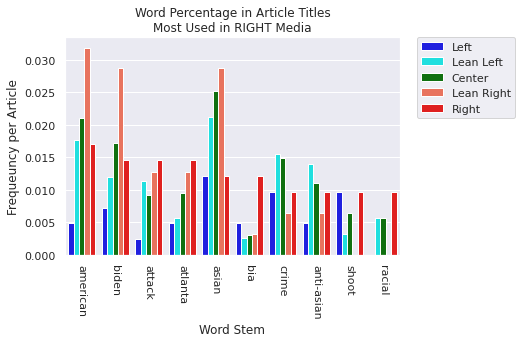

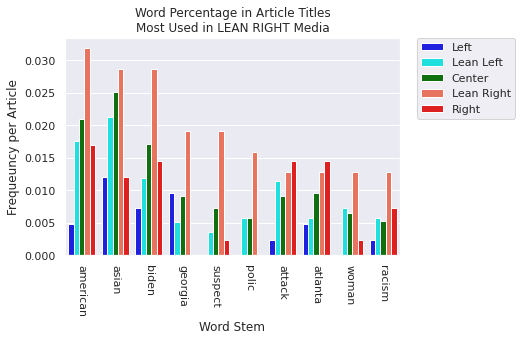

In [ ]:

for position in ['left', 'lean_left', 'right', 'lean_right']:
  plot_word_usage_by_pos(melt_title_percent_df, political_position=position, title_ = f"Word Percentage in Article Titles\nMost Used in {position.replace('_', ' ').upper()} Media")

##### Article Body

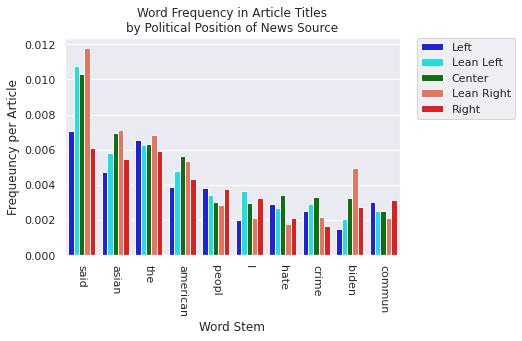

In [ ]:
plot_word_usage_by_pos(melt_body_percent_df)

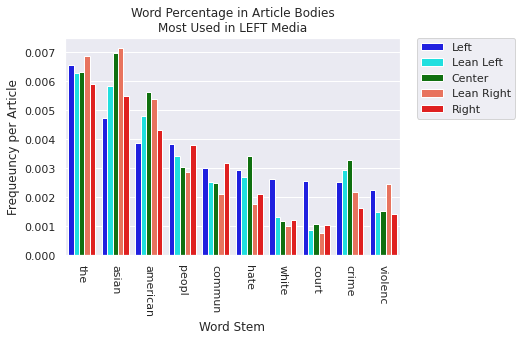

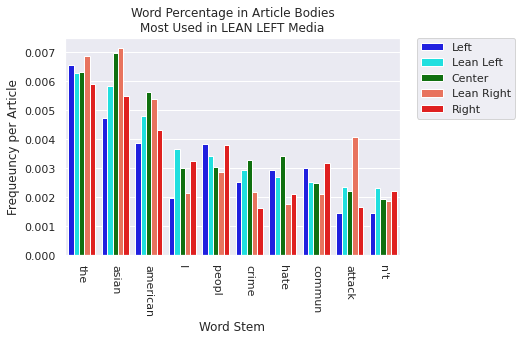

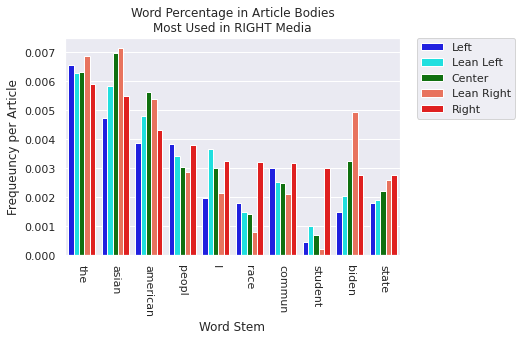

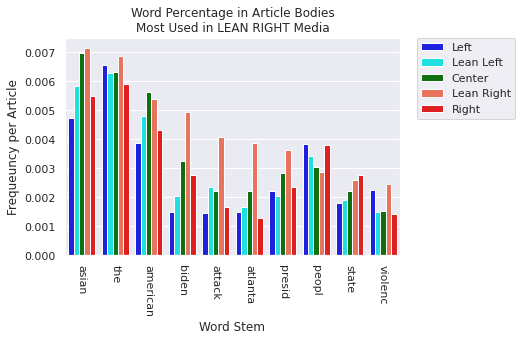

In [ ]:

for position in ['left', 'lean_left', 'right', 'lean_right']:
  plot_word_usage_by_pos(melt_body_percent_df, political_position=position, title_ = f"Word Percentage in Article Bodies\nMost Used in {position.replace('_', ' ').upper()} Media", exclude_front_outliers=1)

#### Verb Percentage

##### Article Title

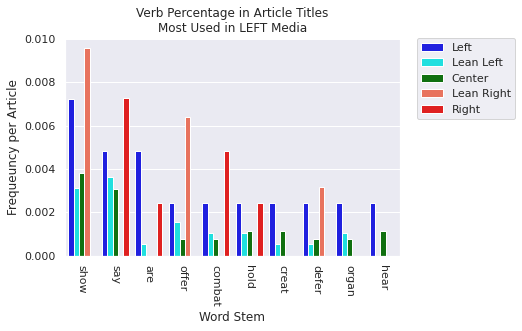

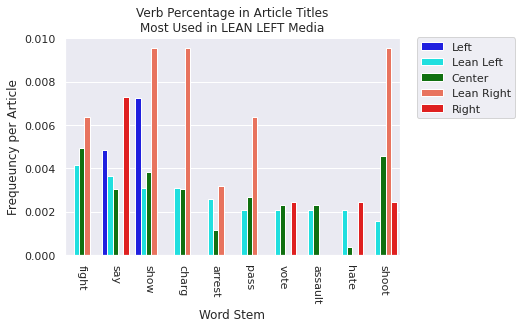

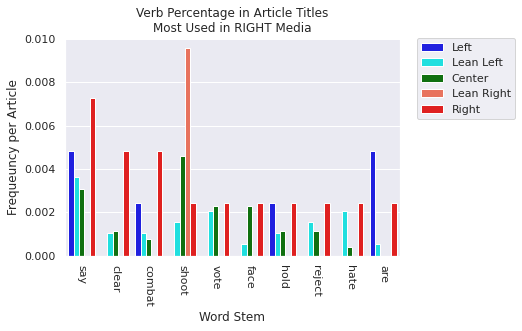

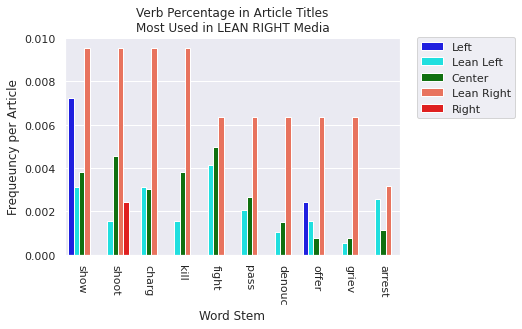

In [ ]:

for position in ['left', 'lean_left', 'right', 'lean_right']:
  plot_word_usage_by_pos(melt_title_percent_df, part_of_speech="VB", political_position=position, title_ = f"Verb Percentage in Article Titles\nMost Used in {position.replace('_', ' ').upper()} Media")

##### Article Body

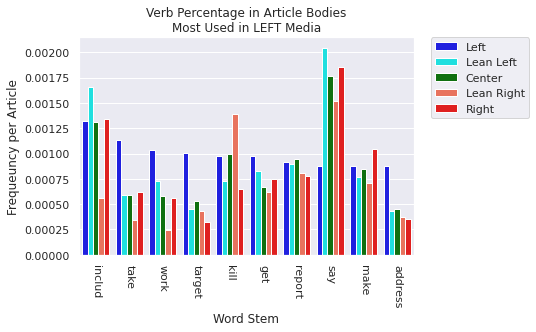

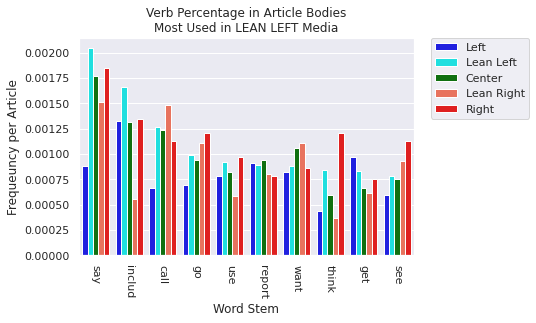

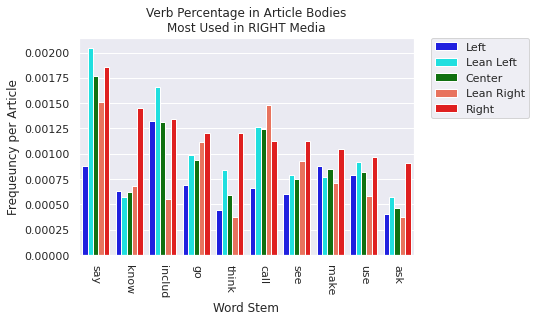

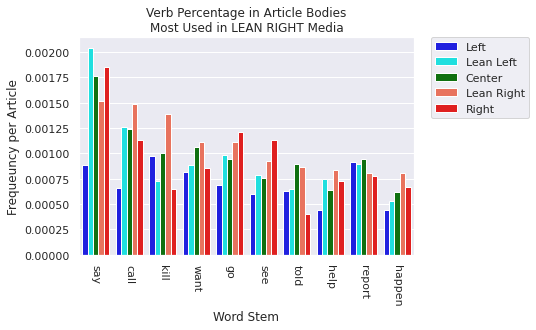

In [ ]:

for position in ['left', 'lean_left', 'right', 'lean_right']:
  plot_word_usage_by_pos(melt_body_percent_df, part_of_speech="VB", political_position=position, title_ = f"Verb Percentage in Article Bodies\nMost Used in {position.replace('_', ' ').upper()} Media", exclude_front_outliers=1)

#### Noun Percentage

##### Article Title

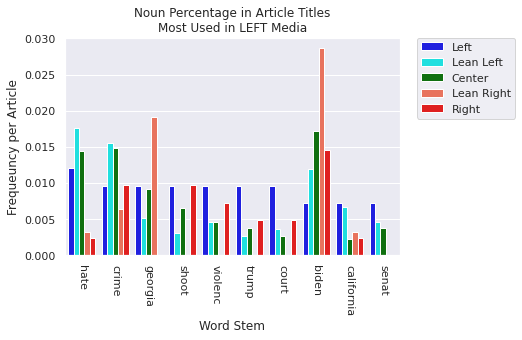

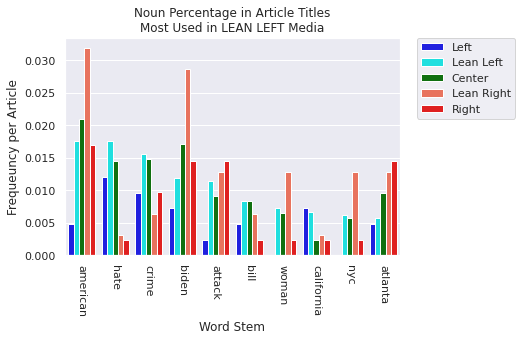

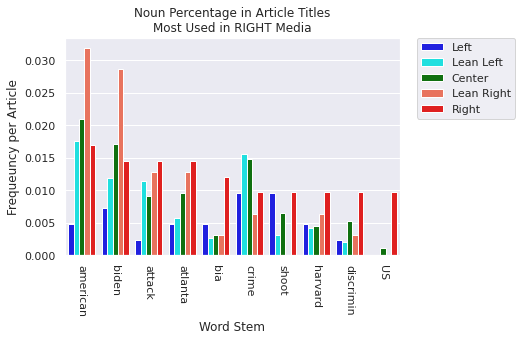

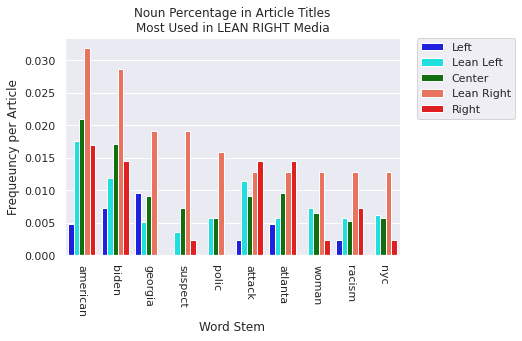

In [ ]:

for position in ['left', 'lean_left', 'right', 'lean_right']:
  plot_word_usage_by_pos(melt_title_percent_df, part_of_speech="NN", political_position=position, title_ = f"Noun Percentage in Article Titles\nMost Used in {position.replace('_', ' ').upper()} Media")

##### Article Body

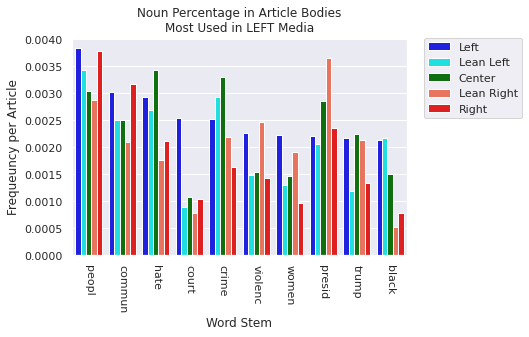

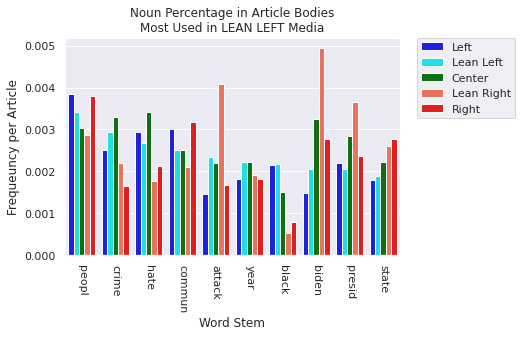

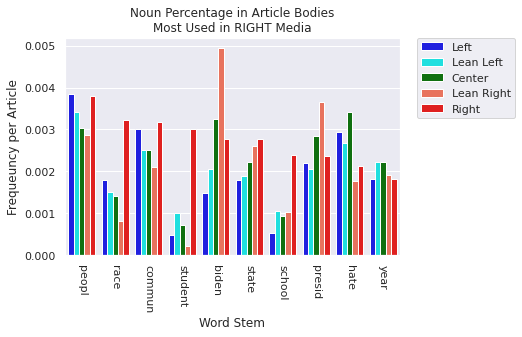

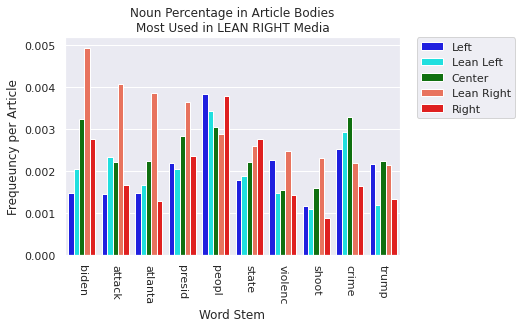

In [ ]:

for position in ['left', 'lean_left', 'right', 'lean_right']:
  plot_word_usage_by_pos(melt_body_percent_df, part_of_speech="NN", political_position=position, title_ = f"Noun Percentage in Article Bodies\nMost Used in {position.replace('_', ' ').upper()} Media", exclude_front_outliers=1)

#### Adjective Percentage

##### Article Title

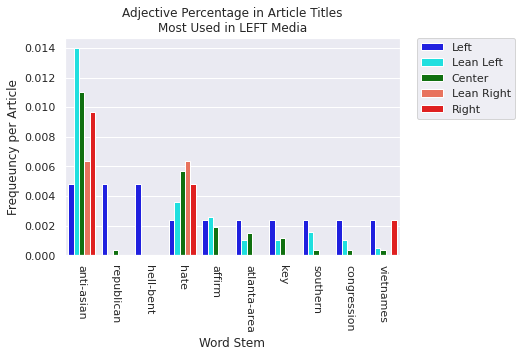

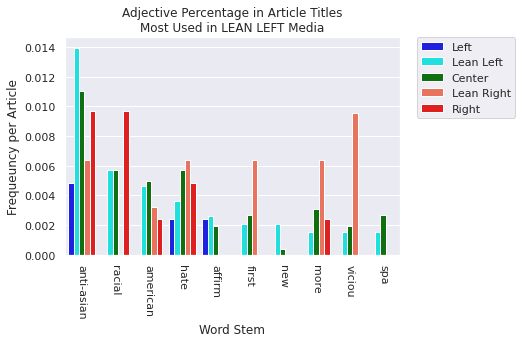

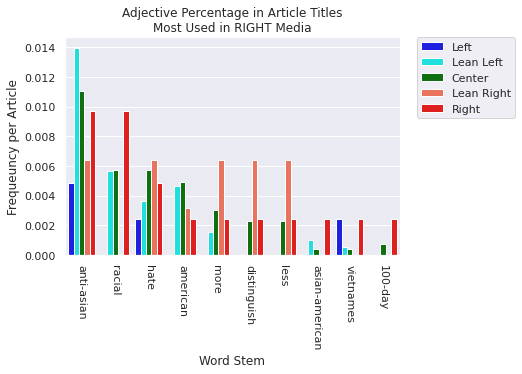

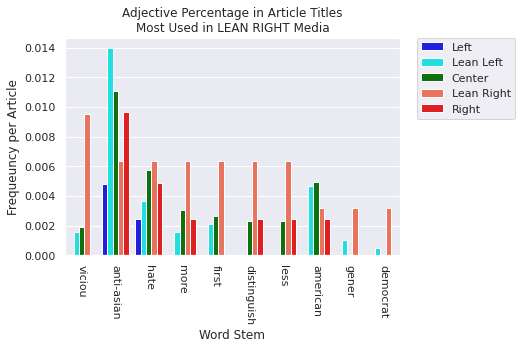

In [ ]:

for position in ['left', 'lean_left', 'right', 'lean_right']:
  plot_word_usage_by_pos(melt_title_percent_df, part_of_speech="JJ", political_position=position, title_ = f"Adjective Percentage in Article Titles\nMost Used in {position.replace('_', ' ').upper()} Media", exclude_front_outliers=1)

##### Article Body

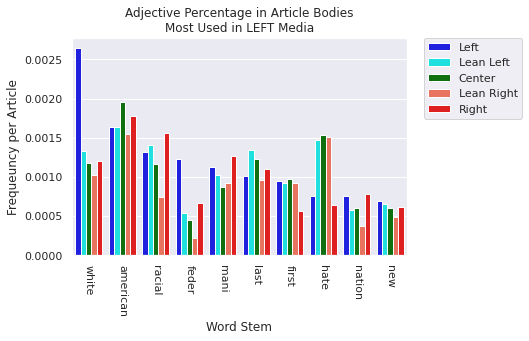

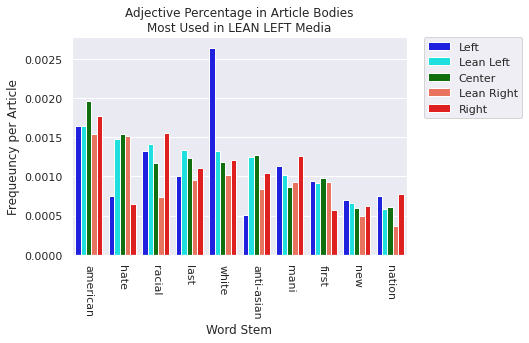

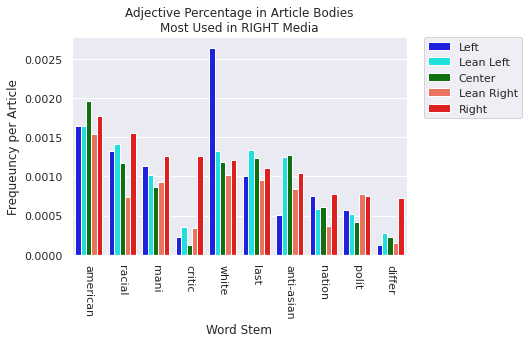

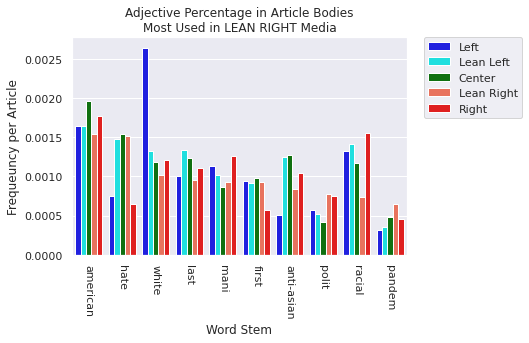

In [ ]:

for position in ['left', 'lean_left', 'right', 'lean_right']:
  plot_word_usage_by_pos(melt_body_percent_df, part_of_speech="JJ", political_position=position, title_ = f"Adjective Percentage in Article Bodies\nMost Used in {position.replace('_', ' ').upper()} Media", exclude_front_outliers=1)

## Concept and Category Visualization

### Load Data

In [ ]:
main_path = "/content/gdrive/MyDrive/AAPI_text_analysis_project"
import os

In [ ]:
concept_df = pd.read_csv(os.path.join(main_path, "concept_dataframe.csv"))
category_df = pd.read_csv(os.path.join(main_path, "category_dataframe.csv"))


In [ ]:
concept_type_df = pd.read_csv(os.path.join(main_path, "concept_type_df.csv"))
concept_type_df.head()

,person,wiki,org,loc,index
0,0.001223,0.001945,0.002091,0.001827,0_per_article_left
1,0.001451,0.001861,0.001275,0.001743,1_per_article_lean_left
2,0.001083,0.001691,0.001056,0.001824,2_per_article_center
3,0.002483,0.001842,0.000198,0.002151,3_per_article_lean_right
4,0.001566,0.001846,0.001078,0.001687,4_per_article_right


In [ ]:
concept_df.head()

,Left,Lean Left,Center,Lean Right,Right,concept_data,concept_label,usage_sum,0_per_article_left,1_per_article_lean_left,4_per_article_right,3_per_article_lean_right,2_per_article_center,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy,concept_type
0,1,4,1,0,0,"{""label"": ""Black church"", ""score"": 5, ""type"": ...",Black church,6,0.027027,0.023121,0.000000,0.000000,0.004425,0.027027,0.023121,0.000000,0.000000,0.004425,person
1,1,3,1,0,0,"{""label"": ""The Reverend"", ""score"": 5, ""type"": ...",The Reverend,5,0.027027,0.017341,0.000000,0.000000,0.004425,0.027027,0.017341,0.000000,0.000000,0.004425,person
2,1,3,2,0,0,"{""label"": ""Christian denomination"", ""score"": 5...",Christian denomination,6,0.027027,0.017341,0.000000,0.000000,0.008850,0.027027,0.017341,0.000000,0.000000,0.008850,wiki
3,1,3,2,0,0,"{""label"": ""Southern Baptist Convention"", ""scor...",Southern Baptist Convention,6,0.027027,0.017341,0.000000,0.000000,0.008850,0.027027,0.017341,0.000000,0.000000,0.008850,org
4,0,5,1,1,1,"{""label"": ""Critical race theory"", ""score"": 5, ...",Critical race theory,8,0.000000,0.028902,0.026316,0.034483,0.004425,0.000000,0.028902,0.026316,0.034483,0.004425,wiki


In [ ]:
category_df.head()

,Left,Lean Left,Center,Lean Right,Right,category,usage_sum,0_per_article_left,1_per_article_lean_left,4_per_article_right,3_per_article_lean_right,2_per_article_center,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy
0,1,5,2,0,0,dmoz/Society,8,0.027027,0.028902,0.000000,0.000000,0.008850,0.027027,0.028902,0.000000,0.000000,0.008850
1,22,116,147,21,23,news/Politics,329,0.594595,0.670520,0.605263,0.724138,0.650442,0.594595,0.670520,0.605263,0.724138,0.650442
2,1,4,2,0,0,dmoz/Society/Religion_and_Spirituality,7,0.027027,0.023121,0.000000,0.000000,0.008850,0.027027,0.023121,0.000000,0.000000,0.008850
3,37,173,226,29,38,dmoz/Society/Issues/Race-Ethnic-Religious_Rela...,503,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,1,4,2,0,0,dmoz/Society/Religion_and_Spirituality/Christi...,7,0.027027,0.023121,0.000000,0.000000,0.008850,0.027027,0.023121,0.000000,0.000000,0.008850


In [ ]:
melt_concept_df = pd.melt(concept_df, id_vars = ["concept_data",
                                                  "usage_sum",
                                                  "concept_label",
                                                  "0_per_article_left_copy",
                                                  "1_per_article_lean_left_copy",
                                                  "4_per_article_right_copy",
                                                  "3_per_article_lean_right_copy",
                                                  "2_per_article_center_copy"
                                                  ],
                        value_vars = ["0_per_article_left",
                                      "1_per_article_lean_left",
                                      "4_per_article_right",
                                      "3_per_article_lean_right",
                                      "2_per_article_center"],
                  var_name = "position",
                  value_name = "usage_per_article")
melt_concept_df.head()

,concept_data,usage_sum,concept_label,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy,position,usage_per_article
0,"{""label"": ""Black church"", ""score"": 5, ""type"": ...",6,Black church,0.027027,0.023121,0.000000,0.000000,0.004425,0_per_article_left,0.027027
1,"{""label"": ""The Reverend"", ""score"": 5, ""type"": ...",5,The Reverend,0.027027,0.017341,0.000000,0.000000,0.004425,0_per_article_left,0.027027
2,"{""label"": ""Christian denomination"", ""score"": 5...",6,Christian denomination,0.027027,0.017341,0.000000,0.000000,0.008850,0_per_article_left,0.027027
3,"{""label"": ""Southern Baptist Convention"", ""scor...",6,Southern Baptist Convention,0.027027,0.017341,0.000000,0.000000,0.008850,0_per_article_left,0.027027
4,"{""label"": ""Critical race theory"", ""score"": 5, ...",8,Critical race theory,0.000000,0.028902,0.026316,0.034483,0.004425,0_per_article_left,0.000000


In [ ]:
melt_category_df = pd.melt(category_df, id_vars = ["category",
                                                  "usage_sum",
                                                  "0_per_article_left_copy",
                                                  "1_per_article_lean_left_copy",
                                                  "4_per_article_right_copy",
                                                  "3_per_article_lean_right_copy",
                                                  "2_per_article_center_copy"
                                                  ],
                        value_vars = ["0_per_article_left",
                                      "1_per_article_lean_left",
                                      "4_per_article_right",
                                      "3_per_article_lean_right",
                                      "2_per_article_center"],
                  var_name = "position",
                  value_name = "usage_per_article")
melt_category_df.head()

,category,usage_sum,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy,position,usage_per_article
0,dmoz/Society,8,0.027027,0.028902,0.000000,0.000000,0.008850,0_per_article_left,0.027027
1,news/Politics,329,0.594595,0.670520,0.605263,0.724138,0.650442,0_per_article_left,0.594595
2,dmoz/Society/Religion_and_Spirituality,7,0.027027,0.023121,0.000000,0.000000,0.008850,0_per_article_left,0.027027
3,dmoz/Society/Issues/Race-Ethnic-Religious_Rela...,503,1.000000,1.000000,1.000000,1.000000,1.000000,0_per_article_left,1.000000
4,dmoz/Society/Religion_and_Spirituality/Christi...,7,0.027027,0.023121,0.000000,0.000000,0.008850,0_per_article_left,0.027027


In [ ]:
def plot_usage_by_pos(melt_df, kind, political_position="usage_sum", title_ = "Frequency per Article\nby News Source Political Position", num_highest_used=10):
  to_sort = "usage_sum"
  if political_position.lower() == "left":
    to_sort = ["0_per_article_left_copy", "usage_sum"]
  if political_position.lower() == "lean_left":
    to_sort = ["1_per_article_lean_left_copy", "usage_sum"]
  if political_position.lower() == "center":
    to_sort = ["2_per_article_center_copy", "usage_sum"]
  if political_position.lower() == "lean_right":
    to_sort = ["3_per_article_lean_right_copy", "usage_sum"]
  if political_position.lower() == "right":
    to_sort = ["4_per_article_right_copy", "usage_sum"]


  filt_data = melt_df.sort_values(to_sort, ascending = False)

  top_kind = filt_data.groupby(kind).sum().sort_values(to_sort, ascending = False).index.values[:num_highest_used]

  filtered_data = []

  adjusted_kind = []

  for k in top_kind:
    filtered_data.extend(filt_data[filt_data[kind] == k].values.tolist())
    if kind == "category":
      adjusted_kind.extend([k.split('/')[-1]]*filt_data[filt_data[kind] == k].shape[0])
  
  filtered_df = pd.DataFrame(filtered_data, columns = filt_data.columns).sort_values(to_sort, ascending = False)

  if kind == "category":
    filtered_df[kind] = adjusted_kind

  sns.barplot(data = filtered_df, x = kind, y = "usage_per_article", hue = "position", hue_order = ["0_per_article_left",
                                                                "1_per_article_lean_left",
                                                                "2_per_article_center",
                                                                "3_per_article_lean_right",
                                                                "4_per_article_right"],
                       palette = ["blue", "cyan", "green", 'tomato', 'red'], ci = None)
  plt.xticks(rotation = -90)

  ax = plt.gca()

  handles, labels = ax.get_legend_handles_labels()

  new_handles = [h for h, l in sorted(zip(handles, labels), key = lambda x: x[1])]

  ax.legend(new_handles, ["Left", "Lean Left", "Center", "Lean Right", "Right"], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

  
  plt.title(title_)

  plt.xlabel(kind.capitalize())

  plt.ylabel("Frequeuncy per Article")

  plt.show()


### Concept Visualizations

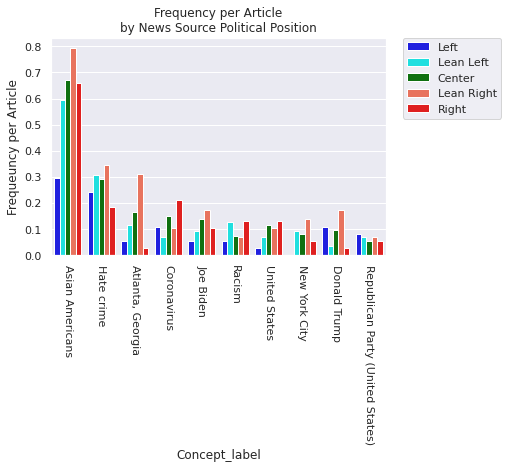

In [ ]:
plot_usage_by_pos(melt_concept_df, "concept_label")

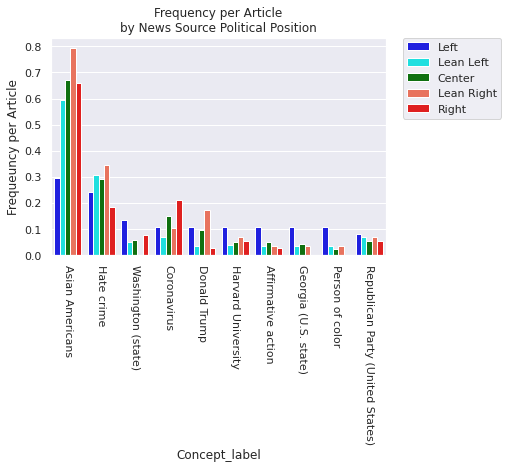

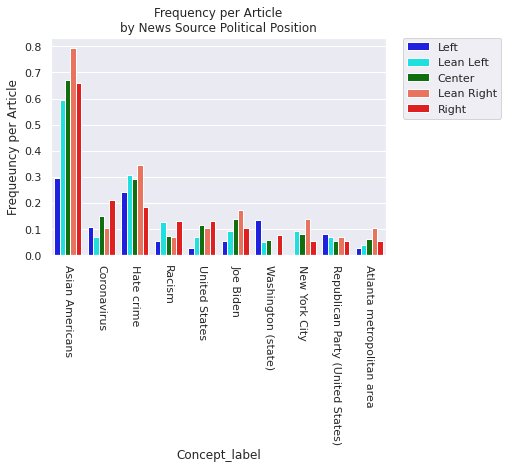

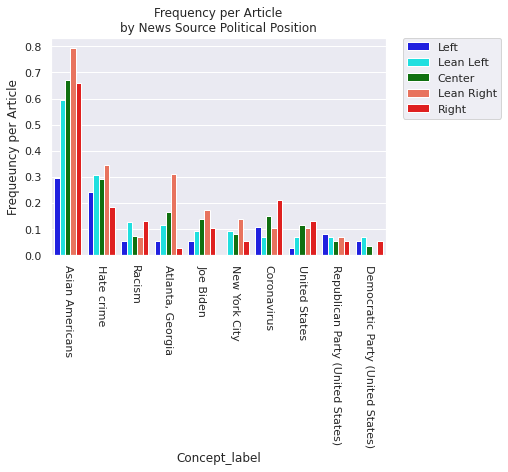

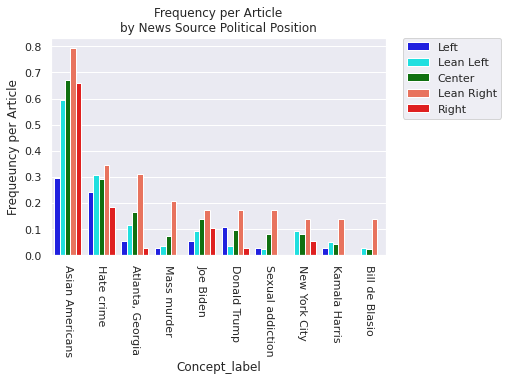

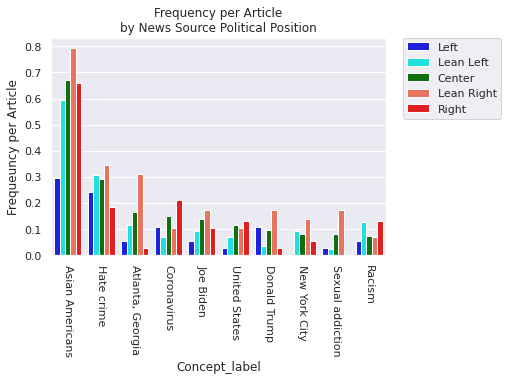

In [ ]:
for k in ["left", "right", 'lean_left', 'lean_right', 'center']:
  plot_usage_by_pos(melt_concept_df, "concept_label", political_position=k)

### Category Visualization

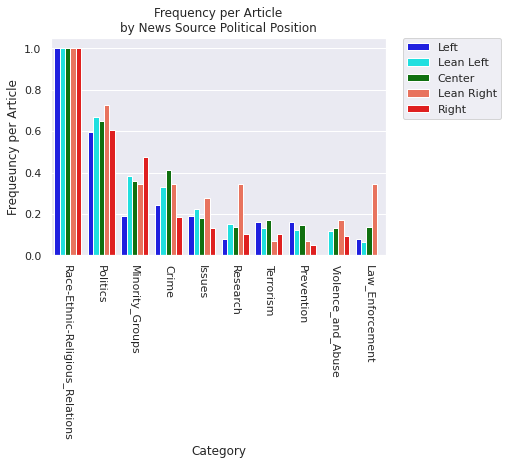

In [ ]:
plot_usage_by_pos(melt_category_df, "category")

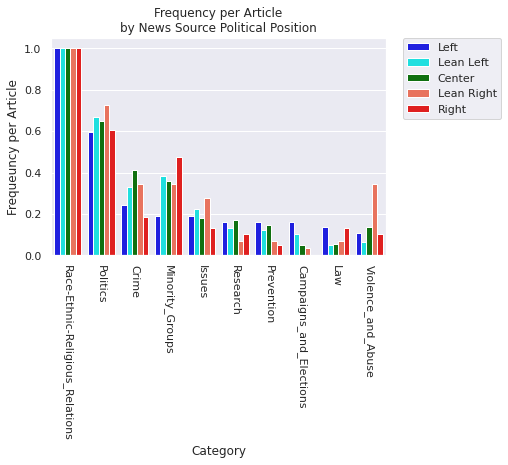

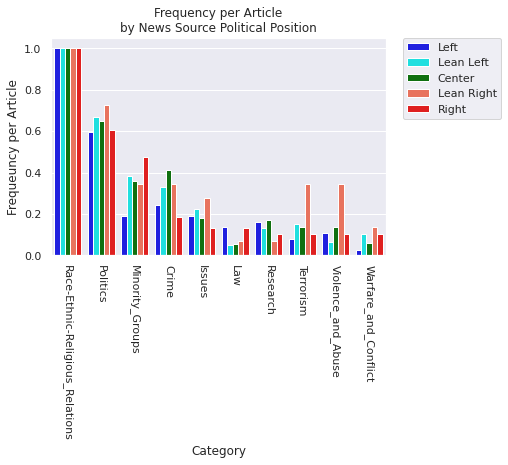

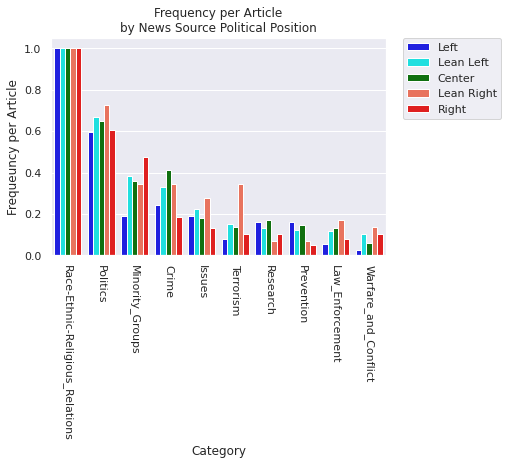

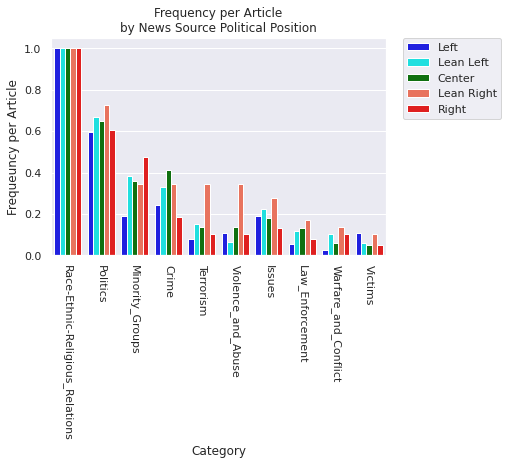

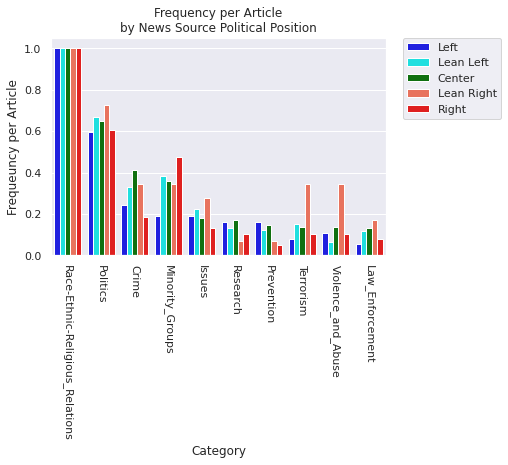

In [ ]:
for k in ['left', 'right', 'lean_left', 'lean_right', 'center']:
  plot_usage_by_pos(melt_category_df, "category", political_position=k)

### Concept Type Visualization

In [ ]:
def plot_concept_type(df, y_, title_ = "Concept Type Frequency per Article\nBy News Source Political Position"):
  plt.figure()
  sns.barplot(data = df, x = "index", y = y_)
  plt.xticks(rotation = -90)
  plt.title(y_.capitalize() + "-" + title_)
  plt.ylabel("Frequency per Article")
  plt.xlabel("Political Positions")

  ax = plt.gca()

  ax.set_xticklabels(["Left", "Lean Left", "Center", "Lean Right", "Right"])


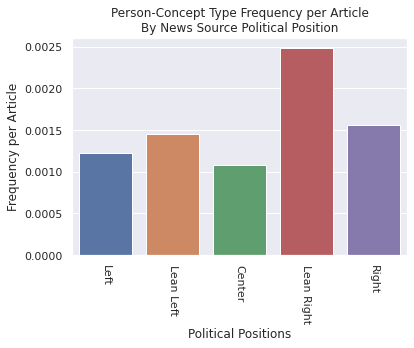

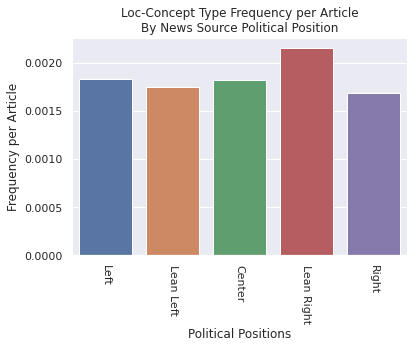

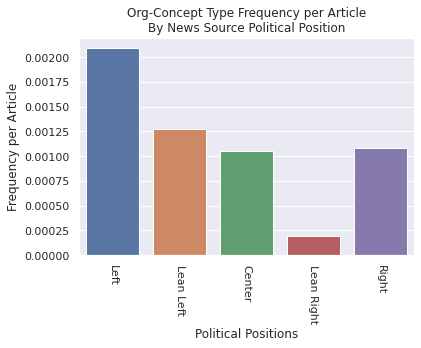

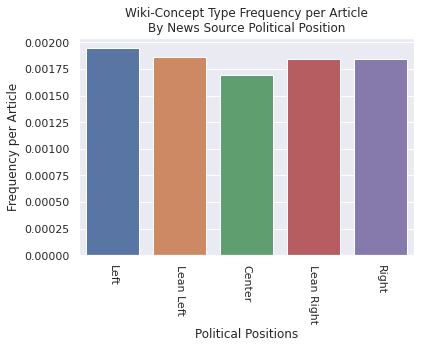

In [ ]:
for t in ["person", "loc", "org", "wiki"]:
  plot_concept_type(concept_type_df, t)

## Top Picks of Visualizations TODO: Write Important Observations

### Part of Speech

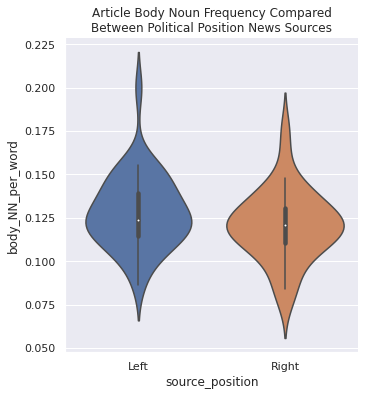

In [ ]:
sns.catplot(data = df[df['source_position'].isin(['Left', 'Right'])], x = "source_position", y = "body_NN_per_word", kind = "violin")
plt.title("Article Body Noun Frequency Compared\nBetween Political Position News Sources")
pass

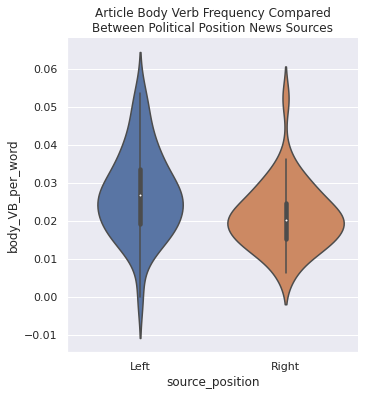

In [ ]:
sns.catplot(data = df[df['source_position'].isin(['Left', 'Right'])], x = "source_position", y = "body_VB_per_word", kind = "violin")
plt.title("Article Body Verb Frequency Compared\nBetween Political Position News Sources")
pass

### Sentiment and Structure

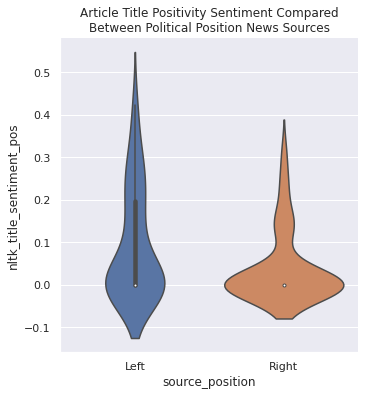

In [ ]:
sns.catplot(data = df[df['source_position'].isin(['Left', 'Right'])], x = "source_position", y = "nltk_title_sentiment_pos", kind = "violin")
plt.title("Article Title Positivity Sentiment Compared\nBetween Political Position News Sources")
pass

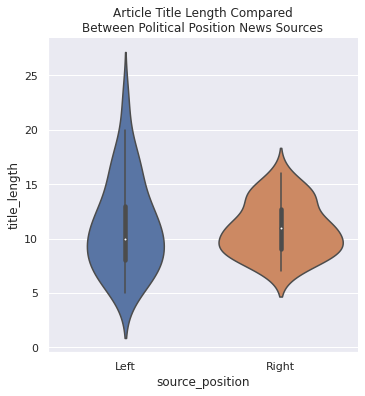

In [ ]:
sns.catplot(data = df[df['source_position'].isin(['Left', 'Right'])], x = "source_position", y = "title_length", kind = "violin")
plt.title("Article Title Length Compared\nBetween Political Position News Sources")
pass

### Word Choice

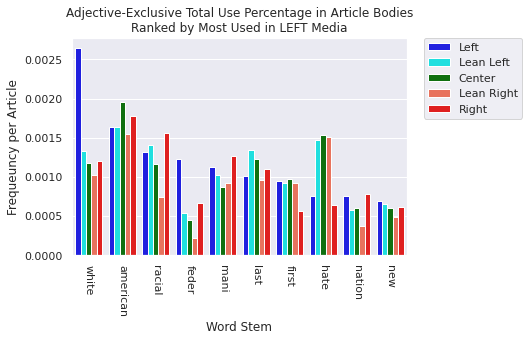

In [ ]:
plot_word_usage_by_pos(melt_body_percent_df, part_of_speech="JJ", political_position="left", title_ = f"Adjective-Exclusive Total Use Percentage in Article Bodies\nRanked by Most Used in LEFT Media", exclude_front_outliers=1)

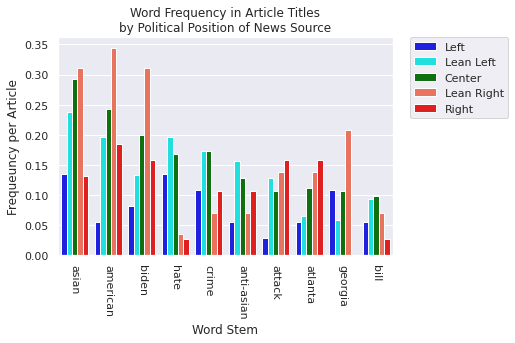

In [ ]:
plot_word_usage_by_pos(melt_title_df)

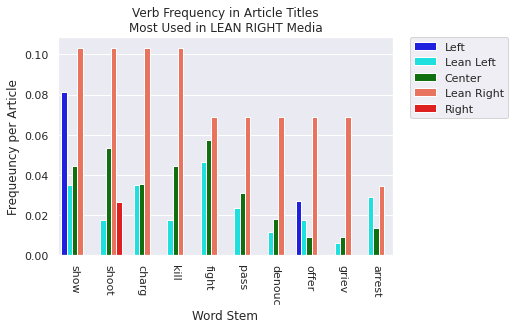

In [ ]:
plot_word_usage_by_pos(melt_title_df, part_of_speech = "VB", political_position="lean_right", title_ = f"Verb Frequency in Article Titles\nMost Used in LEAN RIGHT Media")

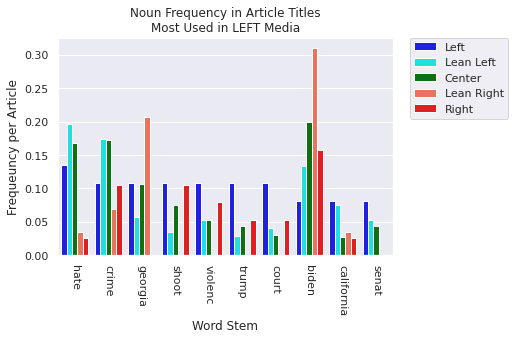

In [ ]:
plot_word_usage_by_pos(melt_title_df, part_of_speech = "NN", political_position="left", title_ = f"Noun Frequency in Article Titles\nMost Used in LEFT Media")

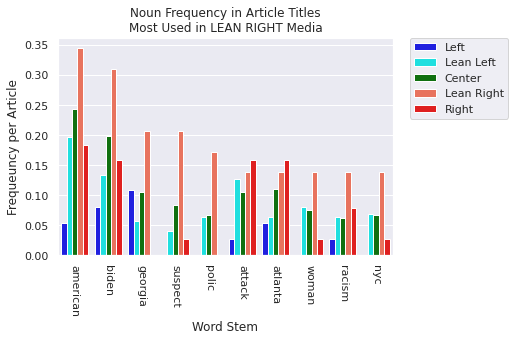

In [ ]:
plot_word_usage_by_pos(melt_title_df, part_of_speech = "NN", political_position="lean_right", title_ = f"Noun Frequency in Article Titles\nMost Used in LEAN RIGHT Media")

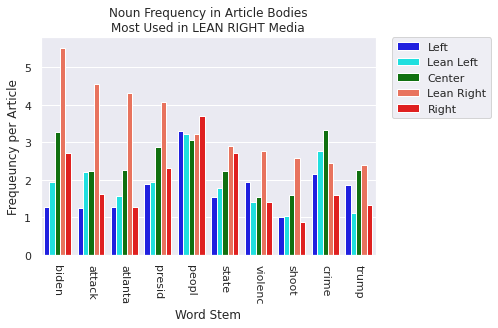

In [ ]:
  plot_word_usage_by_pos(melt_body_df, part_of_speech = "NN", political_position="lean_right", title_ = f"Noun Frequency in Article Bodies\nMost Used in LEAN RIGHT Media", exclude_front_outliers=1)

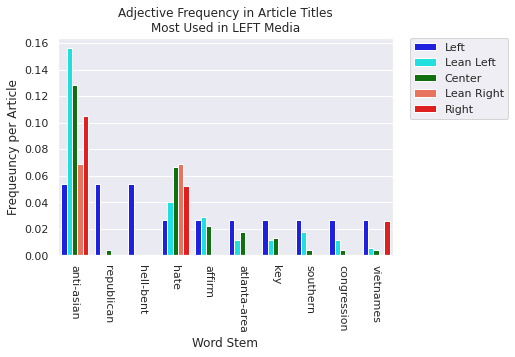

In [ ]:
plot_word_usage_by_pos(melt_title_df, part_of_speech = "JJ", political_position="left", title_ = f"Adjective Frequency in Article Titles\nMost Used in LEFT Media", exclude_front_outliers=1)

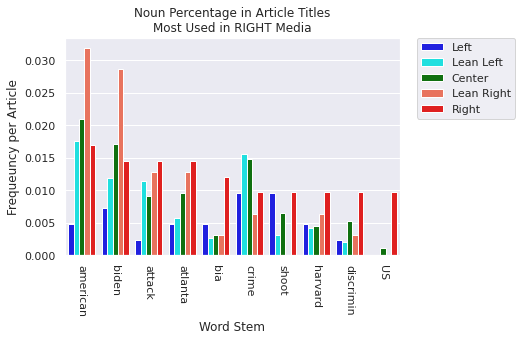

In [ ]:
plot_word_usage_by_pos(melt_title_percent_df, part_of_speech="NN", political_position="right", title_ = f"Noun Percentage in Article Titles\nMost Used in RIGHT Media")
# biden, atlanta, bias, harvard, discrimination, and US difference

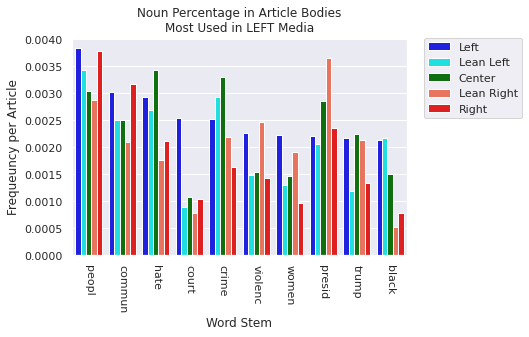

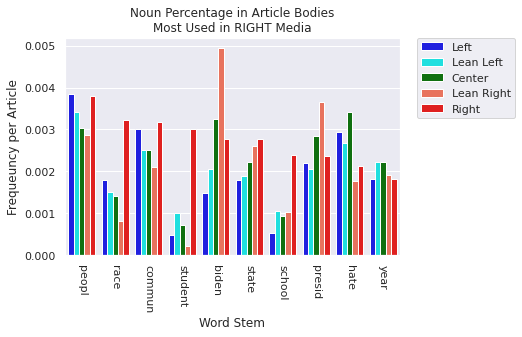

In [ ]:
# Small Comparison between Left and Right
plot_word_usage_by_pos(melt_body_percent_df, part_of_speech="NN", political_position="left", title_ = f"Noun Percentage in Article Bodies\nMost Used in LEFT Media", exclude_front_outliers=1)
plot_word_usage_by_pos(melt_body_percent_df, part_of_speech="NN", political_position="right", title_ = f"Noun Percentage in Article Bodies\nMost Used in RIGHT Media", exclude_front_outliers=1)

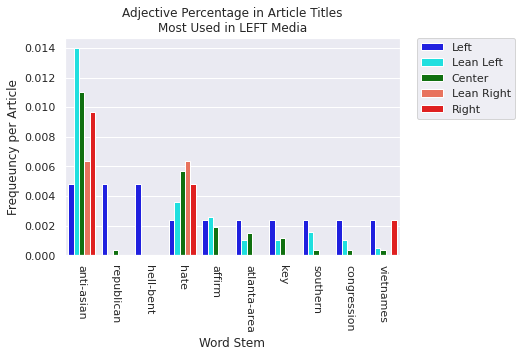

In [ ]:
plot_word_usage_by_pos(melt_title_percent_df, part_of_speech="JJ", political_position="left", title_ = f"Adjective Percentage in Article Titles\nMost Used in LEFT Media", exclude_front_outliers=1)

### Concepts

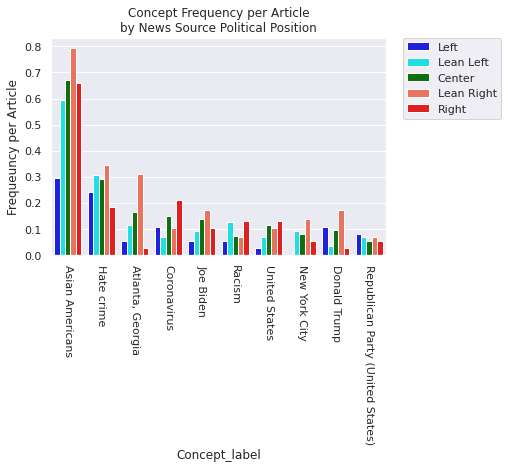

In [ ]:
plot_usage_by_pos(melt_concept_df, "concept_label", title_="Concept Frequency per Article\nby News Source Political Position")


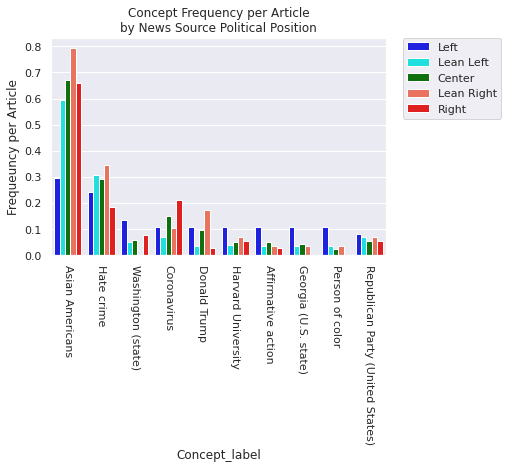

In [ ]:
plot_usage_by_pos(melt_concept_df, "concept_label", political_position="left", title_="Concept Frequency per Article\nby News Source Political Position")


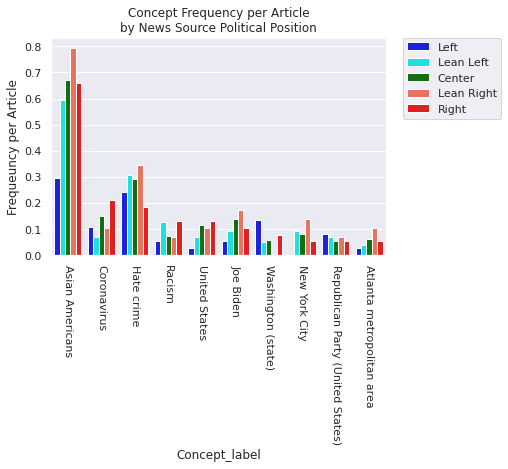

In [ ]:
plot_usage_by_pos(melt_concept_df, "concept_label", political_position="right", title_="Concept Frequency per Article\nby News Source Political Position")


### Concept Types

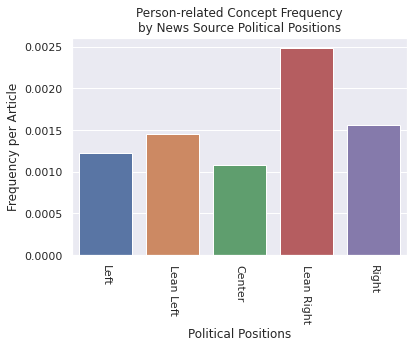

In [ ]:
plot_concept_type(concept_type_df, "person", title_ = "Person-related Concept Frequency\nby News Source Political Positions")

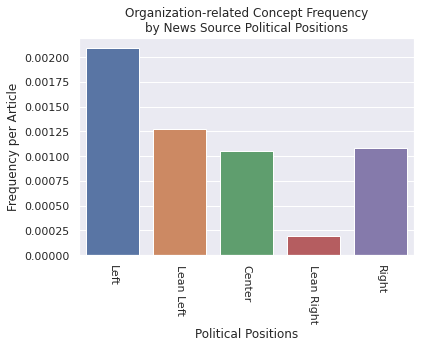

In [ ]:
plot_concept_type(concept_type_df, "org", title_ = "Organization-related Concept Frequency\nby News Source Political Positions")